In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



test_data = pd.read_csv("csv/test.csv",  encoding='latin-1')
train_data = pd.read_csv("csv/train.csv",  encoding='latin-1')

# Leer datos de un csv
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Se combinaran los datos de train y test para tener un dataset completo

In [4]:
house_price = pd.concat([train_data, test_data], ignore_index=True)

house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


## Resumen de los datos

In [5]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Valores nulos
### Se mostraran las columnas con valores nulos unicamente, al ser demasiadas columnas para una mejor lectura

In [6]:
null_count = house_price.isnull().sum()
null_count = null_count[null_count>0]
null_count


MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

## Tipo de cada Variable

In [7]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Tipo de variables

In [8]:
df = pd.read_csv("./csv/Informaci_n_de_Variables_con_Descripci_n.csv")

df

,Unnamed: 0,Variable,Tipo (Cuantitativa o Cualitativa),Discreta o Continua / Nominal o Ordinal,Tipo del Dato,Ejemplo,Descripción
0,Id,Id,Cuantitativa,Discreta,int64,1,Identificador único de la propiedad.
1,MSSubClass,MSSubClass,Cuantitativa,Discreta,int64,60,Clase del edificio según el tipo de vivienda.
2,MSZoning,MSZoning,Cualitativa,Nominal,object,RL,Clasificación de la zona en la que se encuentr...
3,LotFrontage,LotFrontage,Cuantitativa,Continua,float64,65.0,Longitud de la fachada de la propiedad en pies.
4,LotArea,LotArea,Cuantitativa,Discreta,int64,8450,Tamaño total del lote en pies cuadrados.
...,...,...,...,...,...,...,...
76,MoSold,MoSold,Cuantitativa,Discreta,int64,2,Mes en el que se vendió la vivienda.
77,YrSold,YrSold,Cuantitativa,Discreta,int64,2008,Año en el que se vendió la vivienda.
78,SaleType,SaleType,Cualitativa,Nominal,object,WD,Tipo de venta.
79,SaleCondition,SaleCondition,Cualitativa,Nominal,object,Normal,Condición de la venta.


## Variables cuantitativas con PP-plot

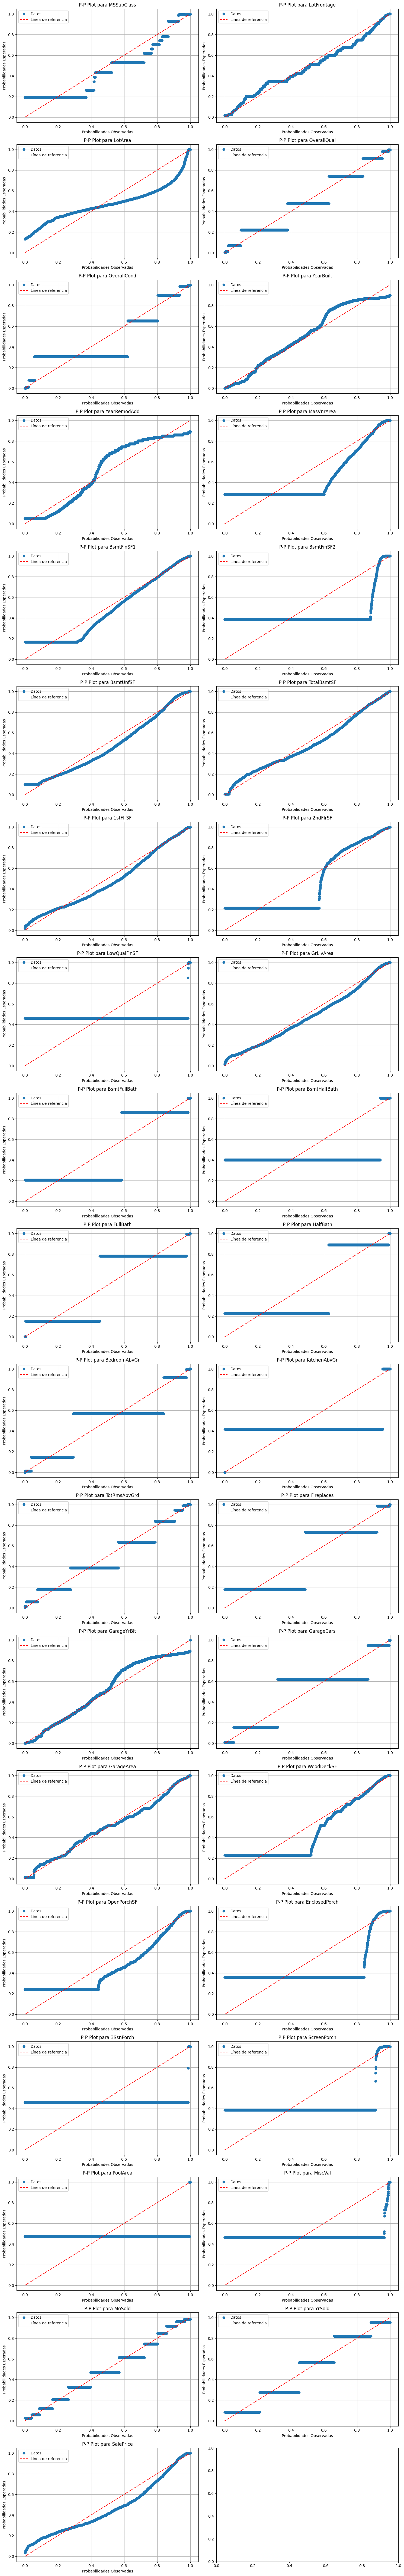

In [9]:
var_cuantitativas = house_price.select_dtypes(include=np.number).drop(columns=["Id"], errors='ignore')

num_vars = len(var_cuantitativas.columns)
cols = 2
rows = (num_vars // cols) + (num_vars % cols > 0)  

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows)) 
axes = axes.flatten()  

normalidad = {}

for i, col in enumerate(var_cuantitativas.columns):
    # Prueba de Kolmogorov-Smirnov
    stat, p = st.kstest(var_cuantitativas[col], 'norm', 
                        args=(var_cuantitativas[col].mean(), var_cuantitativas[col].std()))
    normalidad[col] = {'Estadístico': stat, 'p-valor': p, 'Normal': p > 0.05}

    # Calcular valores esperados y observados para el P-P Plot
    data_sorted = np.sort(var_cuantitativas[col].dropna()) 
    cum_prob = np.linspace(0, 1, len(data_sorted))  
    norm_data = st.norm.cdf(data_sorted, loc=var_cuantitativas[col].mean(), scale=var_cuantitativas[col].std())

    axes[i].plot(cum_prob, norm_data, marker='o', linestyle='', label='Datos')
    axes[i].plot([0, 1], [0, 1], color='r', linestyle='--', label='Línea de referencia')
    axes[i].set_title(f'P-P Plot para {col}')
    axes[i].set_xlabel('Probabilidades Observadas')
    axes[i].set_ylabel('Probabilidades Esperadas')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Pocas variables siguen una distribución normal de manera precisa.
### La mayoría de las variables presentan sesgo, colas gruesas o delgadas, lo que indica que su comportamiento se aleja de la normalidad.
### En algunos casos, las variables muestran segmentación, lo que puede deberse a que tienen una naturaleza discreta en lugar de continua.

## Frecuencia de Variables Cualitativas

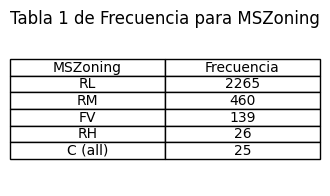

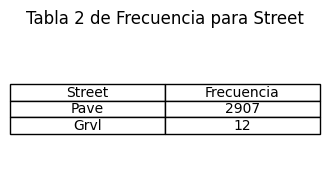

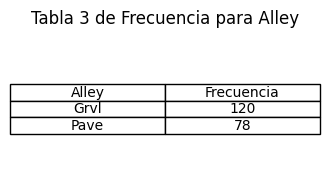

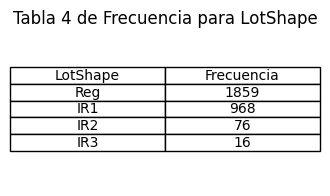

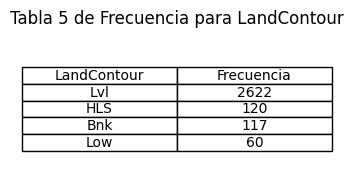

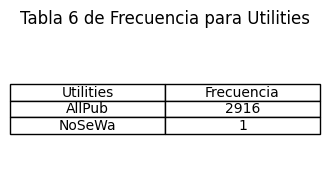

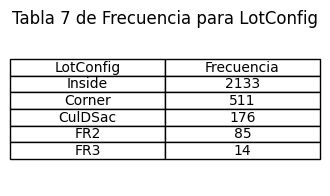

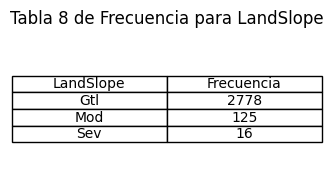

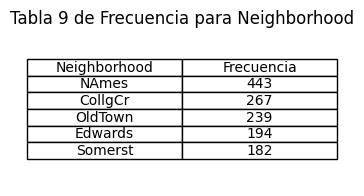

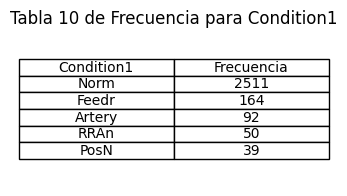

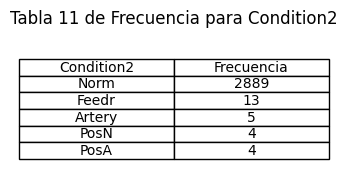

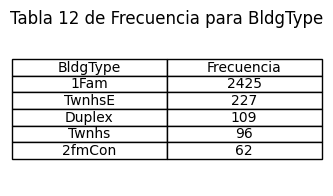

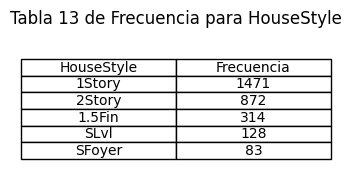

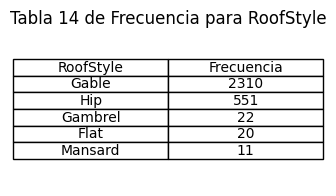

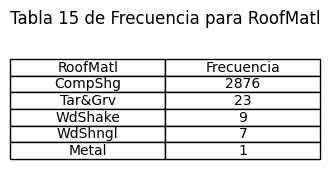

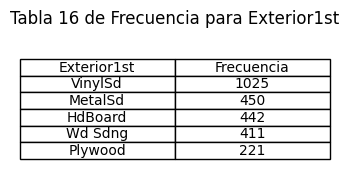

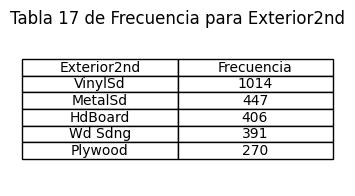

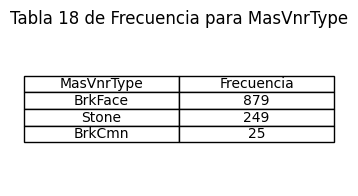

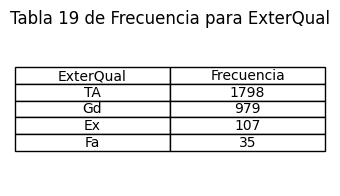

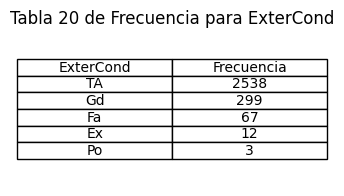

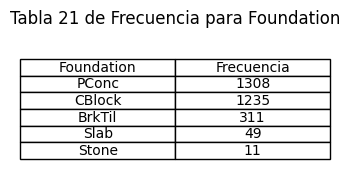

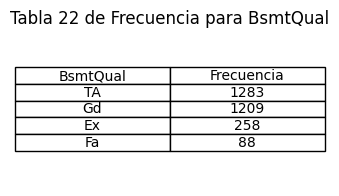

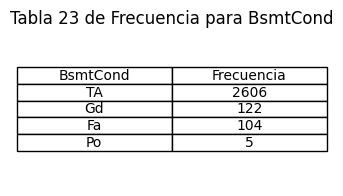

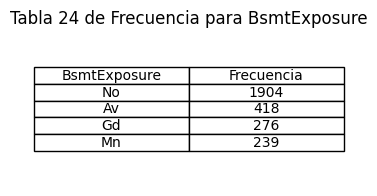

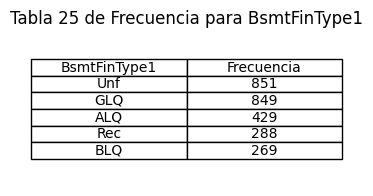

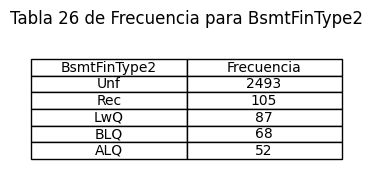

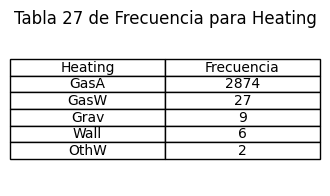

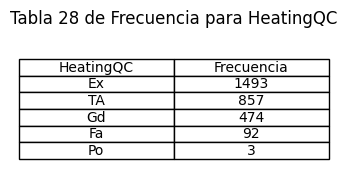

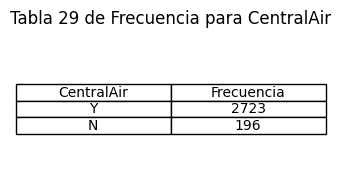

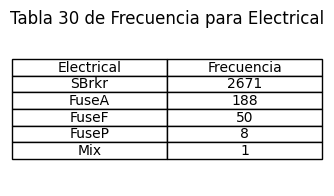

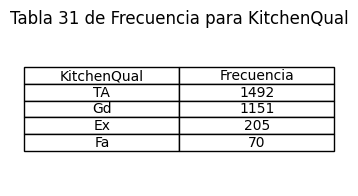

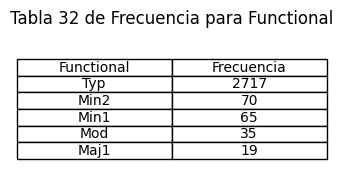

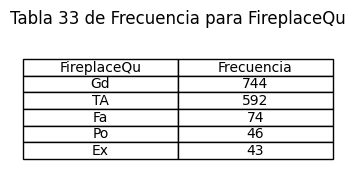

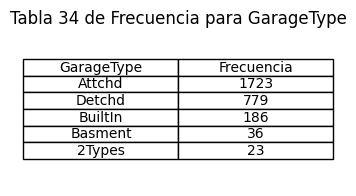

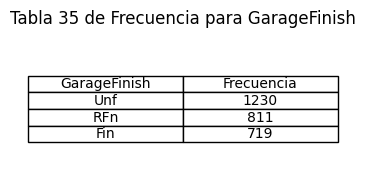

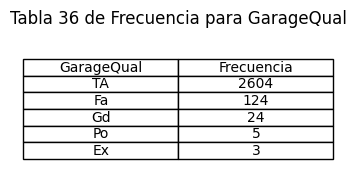

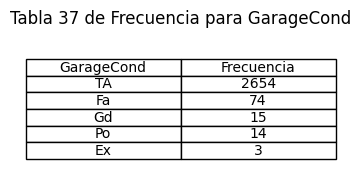

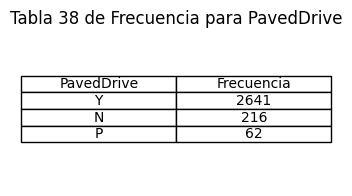

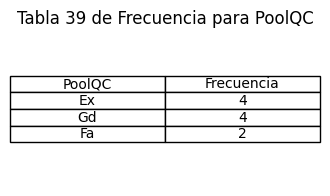

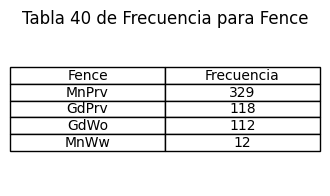

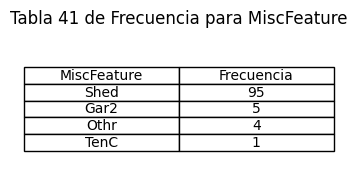

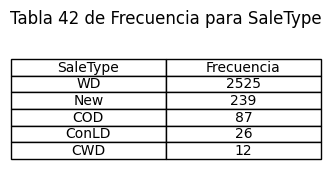

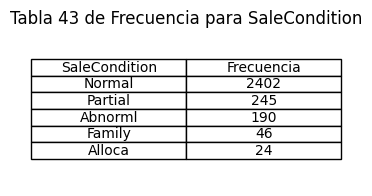

In [22]:
var_cualitativas = house_price.select_dtypes(exclude=np.number).drop(columns=["Id"], errors='ignore')

def process_categorical_data(df, column):
    df[column] = df[column].astype(str).str.strip()
    df[column] = df[column].replace("nan", pd.NA).dropna()
    
    if df[column].str.contains(r'\|', regex=True).any():
        all_values = df[column].str.split('|').explode()
        return all_values.value_counts()
    else:
        return df[column].value_counts()

def generate_frequency_tables(df, qualitative_vars):
    frequency_tables = {}
    for var in qualitative_vars:
        frequency_tables[var] = process_categorical_data(df, var)
    return frequency_tables

def display_frequency_table_as_image(df, column, count):
    """
    Muestra una tabla de frecuencia como imagen en el notebook para la columna especificada.
    """
    plt.figure(figsize=(4, 2))
    plt.axis('tight')
    plt.axis('off')
    plt.title(f"Tabla {count} de Frecuencia para {column}")
    table_data = df.reset_index()
    table_data.columns = [column, "Frecuencia"]
    plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
    plt.show()

tables = generate_frequency_tables(house_price, var_cualitativas)

count = 0
for var, table in tables.items():
    count += 1
    display_frequency_table_as_image(table.head(), var, count)

### Presentan distribución desbalanceada y, en algunos casos, una alta cantidad de categorías únicas.
### Esto sugiere que se debe tener cuidado al utilizar técnicas de modelado que requieran un número limitado de categorías.


# ¿Cómo es la distribución de los precios de las casas y qué tipo de sesgo tiene?




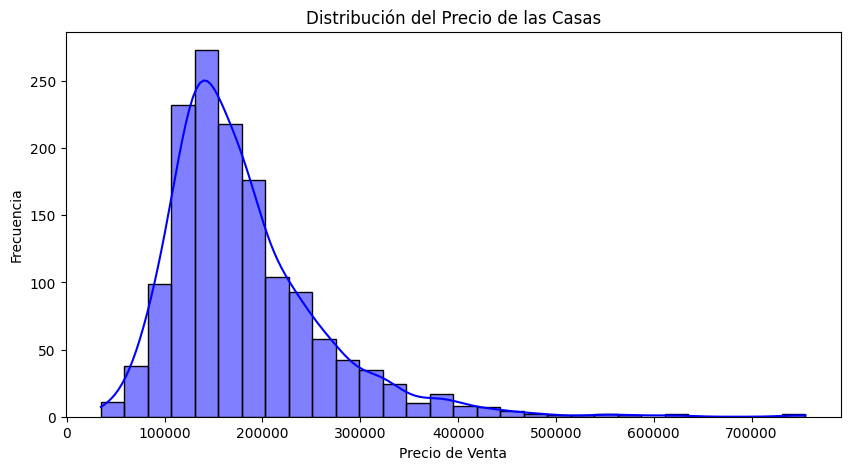

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(var_cuantitativas["SalePrice"], kde=True, bins=30, color="blue")
plt.title("Distribución del Precio de las Casas")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()


# ¿Cómo varía el precio de las casas según una variable categórica clave (por ejemplo, el tipo de vecindario o la calidad de la casa)?

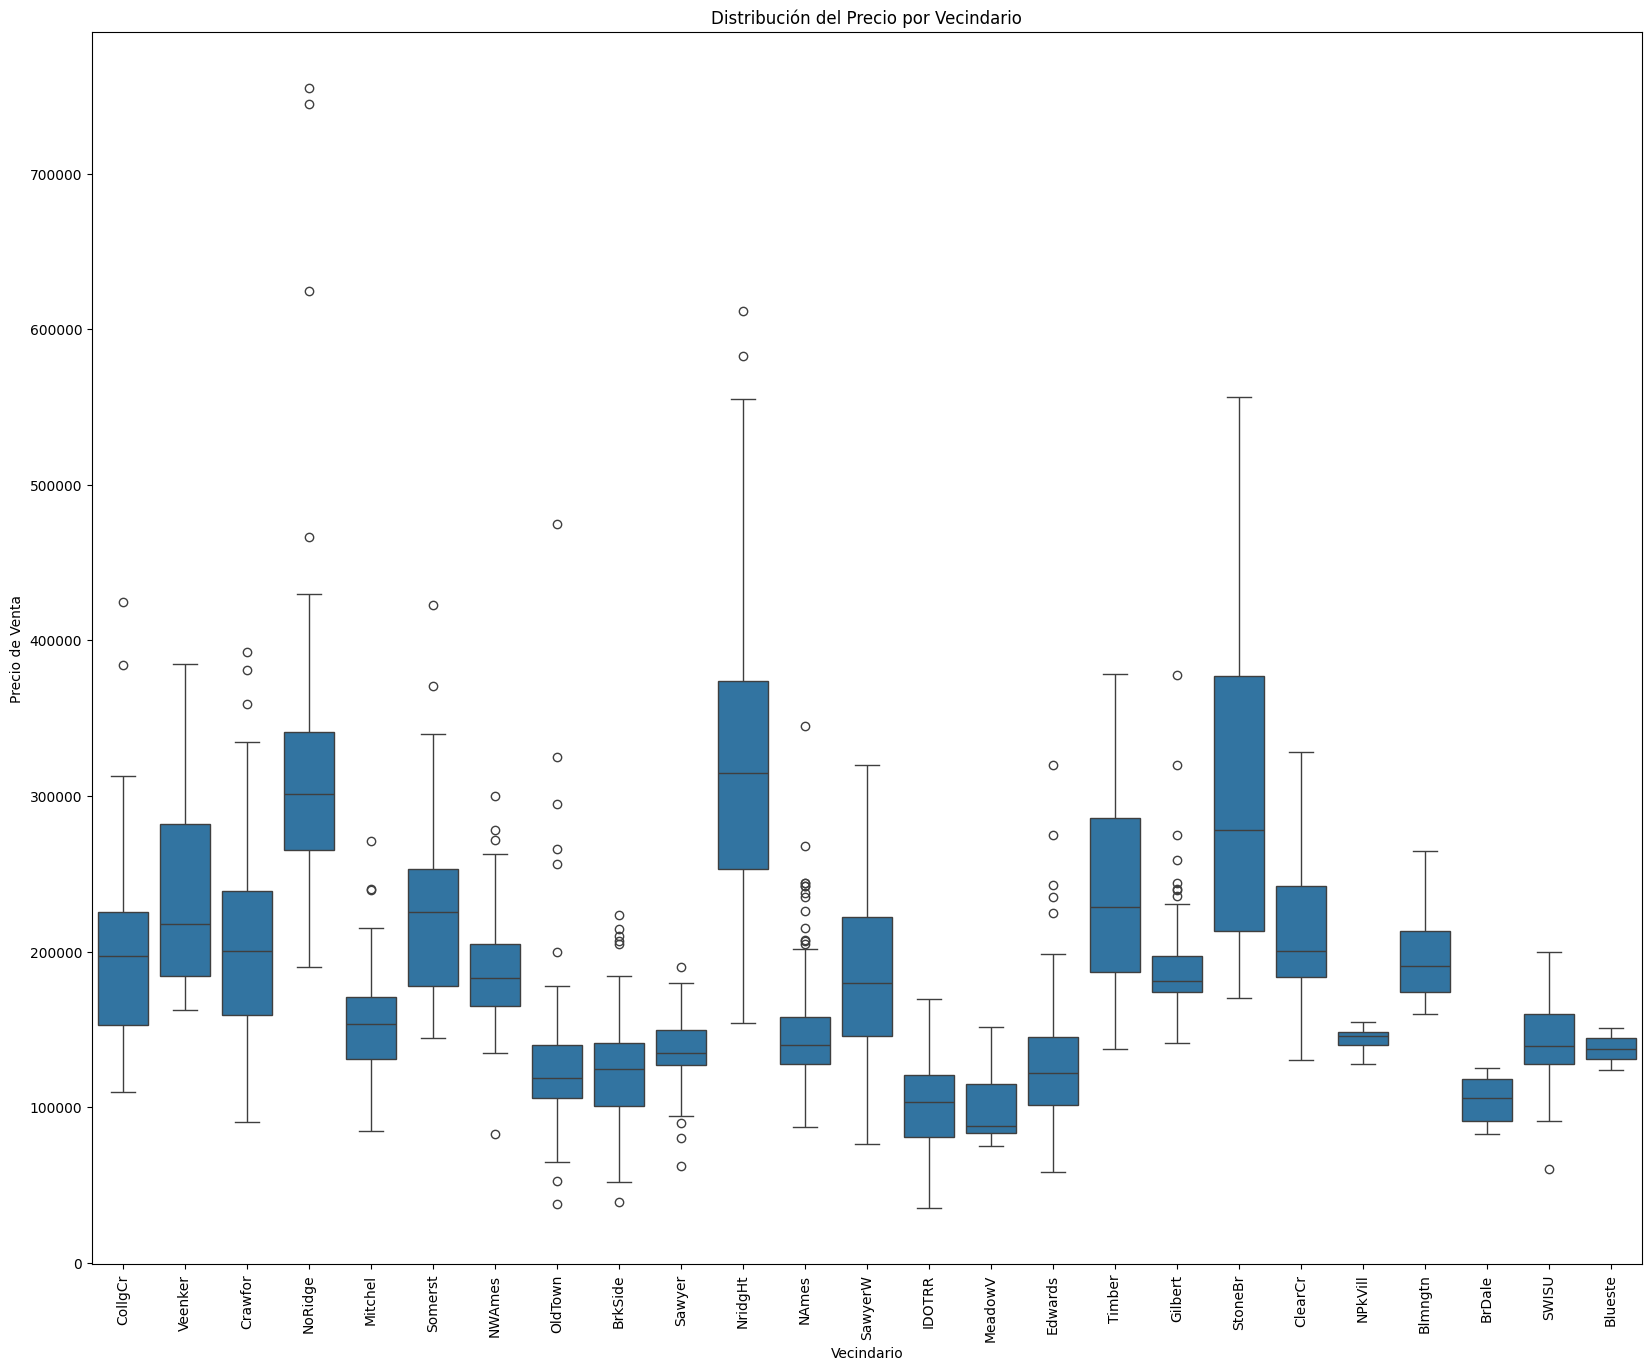

In [35]:
plt.figure(figsize=(20, 16))
sns.boxplot(x=var_cualitativas["Neighborhood"], y=var_cuantitativas["SalePrice"])
plt.xticks(rotation=90)
plt.title("Distribución del Precio por Vecindario")
plt.xlabel("Vecindario")
plt.ylabel("Precio de Venta")
plt.show()

# ¿Existe una relación lineal entre el tamaño de la casa y su precio?



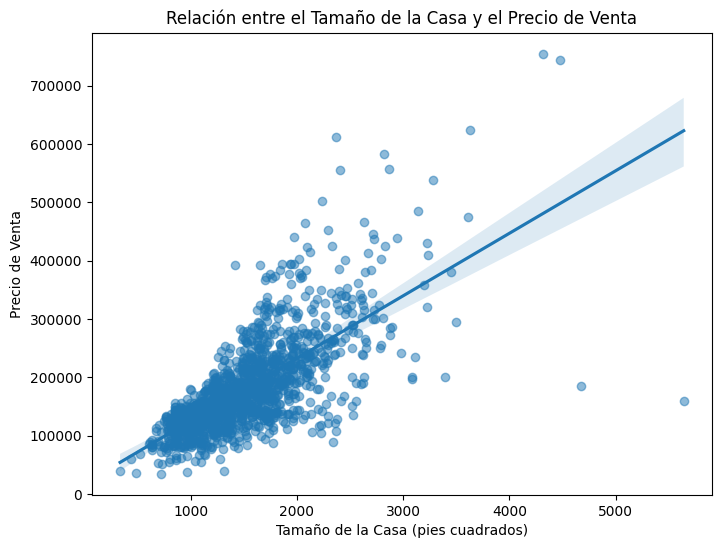

In [36]:
plt.figure(figsize=(8,6))
sns.regplot(x=var_cuantitativas["GrLivArea"], y=var_cuantitativas["SalePrice"], scatter_kws={'alpha':0.5})
plt.title("Relación entre el Tamaño de la Casa y el Precio de Venta")
plt.xlabel("Tamaño de la Casa (pies cuadrados)")
plt.ylabel("Precio de Venta")
plt.show()

# ¿El precio de las casas sigue una distribución normal?

In [45]:

stat, p_value = st.kstest(var_cuantitativas["SalePrice"].dropna(), 'norm')
print(f"Kolmogorov-Smirnov para el Precio de las Casas: Estadística={stat:.4f}, p-valor={p_value}")

if p_value < 0.05:
    print("Se rechaza la hipótesis nula: La variable SalePrice NO sigue una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: La variable SalePrice podría seguir una distribución normal.")


Kolmogorov-Smirnov para el Precio de las Casas: Estadística=1.0000, p-valor=0.0
Se rechaza la hipótesis nula: La variable SalePrice NO sigue una distribución normal.


# ¿Cuáles son las variables cuantitativas más cercanas a una distribución normal y cuáles son las más alejadas?

In [46]:
for col in var_cuantitativas.columns:
    result = st.anderson(var_cuantitativas[col].dropna(), dist='norm')
    print(f"Anderson-Darling para {col}: Estadística={result.statistic:.4f}")
    print(f"Valores Críticos: {result.critical_values}")
    print(f"Niveles de Significancia: {result.significance_level}")

    # Evaluación de la hipótesis: si la estadística es mayor que el valor crítico al 5% de significancia
    alpha_index = 2  # Índice correspondiente al 5% de significancia
    if result.statistic > result.critical_values[alpha_index]:
        print(f"Se rechaza la hipótesis nula para {col}: La variable NO sigue una distribución normal.\n")
    else:
        print(f"No se rechaza la hipótesis nula para {col}: La variable podría seguir una distribución normal.\n")

Anderson-Darling para MSSubClass: Estadística=176.2698
Valores Críticos: [0.575 0.655 0.786 0.917 1.091]
Niveles de Significancia: [15.  10.   5.   2.5  1. ]
Se rechaza la hipótesis nula para MSSubClass: La variable NO sigue una distribución normal.

Anderson-Darling para LotFrontage: Estadística=26.1119
Valores Críticos: [0.575 0.655 0.786 0.916 1.09 ]
Niveles de Significancia: [15.  10.   5.   2.5  1. ]
Se rechaza la hipótesis nula para LotFrontage: La variable NO sigue una distribución normal.

Anderson-Darling para LotArea: Estadística=283.9913
Valores Críticos: [0.575 0.655 0.786 0.917 1.091]
Niveles de Significancia: [15.  10.   5.   2.5  1. ]
Se rechaza la hipótesis nula para LotArea: La variable NO sigue una distribución normal.

Anderson-Darling para OverallQual: Estadística=71.1945
Valores Críticos: [0.575 0.655 0.786 0.917 1.091]
Niveles de Significancia: [15.  10.   5.   2.5  1. ]
Se rechaza la hipótesis nula para OverallQual: La variable NO sigue una distribución normal.



# ¿La variable más correlacionada con el precio sigue una distribución normal?

In [47]:
# Identificar la variable más correlacionada con el precio
correlaciones = var_cuantitativas.corr()["SalePrice"].drop("SalePrice").abs()
variable_mas_correlacionada = correlaciones.idxmax()

# Aplicar Shapiro-Wilk a esa variable
stat, p_value = st.shapiro(var_cuantitativas[variable_mas_correlacionada].dropna())
print(f"Shapiro-Wilk para {variable_mas_correlacionada}: Estadística={stat:.4f}, p-valor={p_value:.4f}")

if p_value < 0.05:
    print(f"Se rechaza la hipótesis nula: La variable {variable_mas_correlacionada} NO sigue una distribución normal.\n")
else:
    print(f"No se rechaza la hipótesis nula: La variable {variable_mas_correlacionada} podría seguir una distribución normal.\n")


Shapiro-Wilk para OverallQual: Estadística=0.9481, p-valor=0.0000
Se rechaza la hipótesis nula: La variable OverallQual NO sigue una distribución normal.



# Division en grupos


## Vamos a agrupar las casas en tres clusters (K=3) según las siguientes variables:

### SalePrice (Precio de venta), GrLivArea (Área habitable sobre el suelo), OverallQual (Calidad general de la casa)
## Estos atributos fueron seleccionados porque tienen una alta correlación con el precio y representan información clave sobre la propiedad.

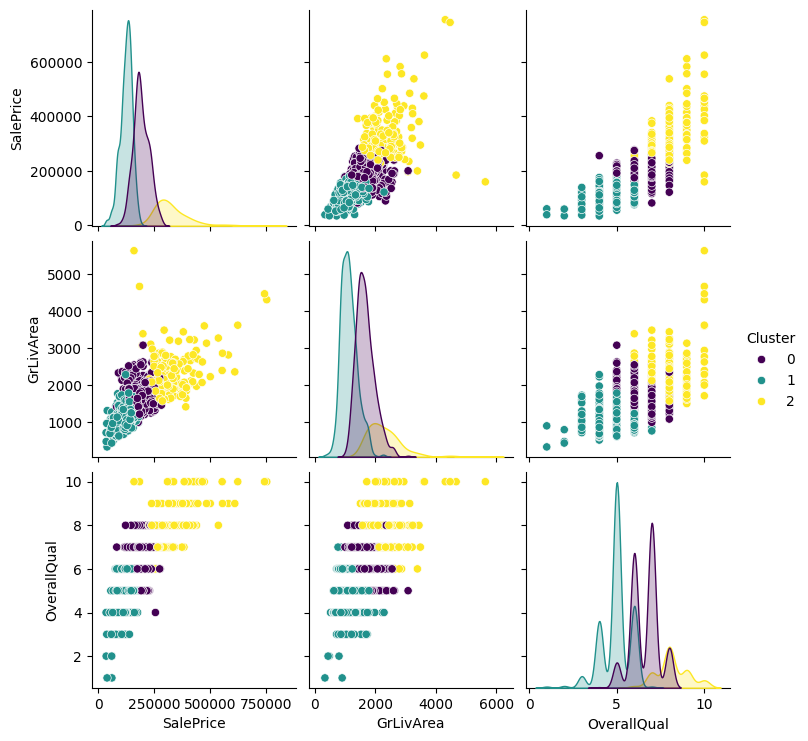

In [51]:
# Seleccionar las variables para el clustering
features = ["SalePrice", "GrLivArea", "OverallQual"]
df_cluster = var_cuantitativas[features].dropna()

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Agregar etiquetas de cluster al dataframe original
var_cuantitativas["Cluster"] = df_cluster["Cluster"]

# Ver distribución de los clusters
sns.pairplot(df_cluster, hue="Cluster", palette="viridis", diag_kind="kde")
plt.show()

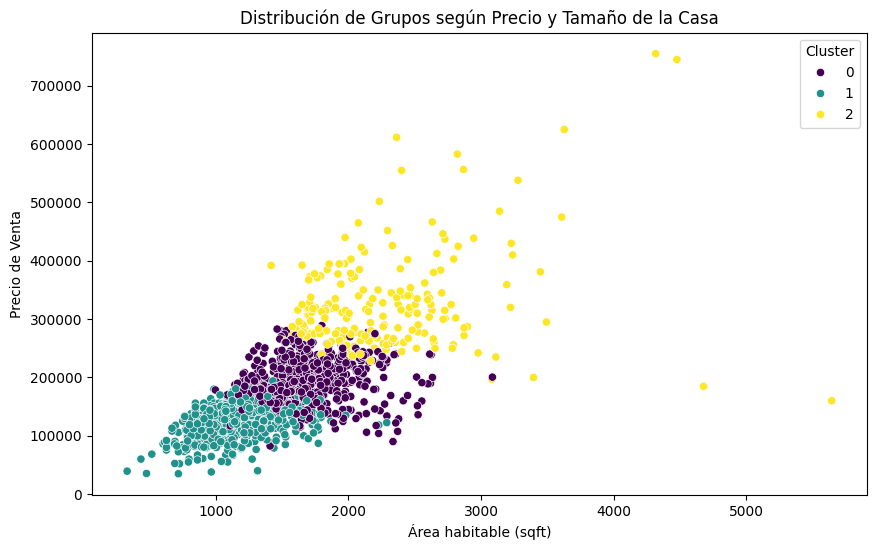

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster["GrLivArea"], y=df_cluster["SalePrice"], hue=df_cluster["Cluster"], palette="viridis")
plt.title("Distribución de Grupos según Precio y Tamaño de la Casa")
plt.xlabel("Área habitable (sqft)")
plt.ylabel("Precio de Venta")
plt.show()
